### # WeatherPy
----

### Analysis
* For the 553 cities that where chosen randomly using the citipy API:
* There are more cities with lower temperatures above the equator. There are no cities with temps below 40degF that are below the equator.
* Humidity seems to increase as you get farther from the equator. There is a small cluster of cities that have zero percent humidity above 60deg latitude.
* The amount of cloud coverage does not seem to depend on the latitude.
* Windspeed in general also does not seem to depend on latitude. Although there are a few cities around a latitude of 60deg that have an increased wind speed above 30mph.


---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import api_keys

# Import API key
#import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
api_keys

'8ca03f7096e817ebb622061dd0ee6133'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_keys}&units={units}&q="

In [5]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=8ca03f7096e817ebb622061dd0ee6133&units=imperial&q='

In [6]:
#list to hold output
output_data = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
         output_data.append({'City': city,
                            'Longitude': response['coord']['lon'], 
                            'Latitude': response['coord']['lat'],
                            'Max Temperature(F)': response['main']['temp_max'],
                            'Humidity(%)': response['main']['humidity'],
                            'Cloudiness': response['clouds']['all'],
                            'Wind Speed(mph)': response['wind']['speed']})
    except:
        pass
    print(f"The weather API responded with: {response}.")

The weather API responded with: {'coord': {'lon': -47.56, 'lat': -24.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 83.28, 'pressure': 1017.7, 'humidity': 92, 'temp_min': 83.28, 'temp_max': 83.28, 'sea_level': 1025.35, 'grnd_level': 1017.7}, 'wind': {'speed': 3.74, 'deg': 326.002}, 'clouds': {'all': 0}, 'dt': 1546867447, 'sys': {'message': 0.0214, 'country': 'BR', 'sunrise': 1546849739, 'sunset': 1546898653}, 'id': 3461465, 'name': 'Iguape', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1011, 'humidity': 73, 'temp_min': 75.2, 'temp_max': 75.2}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 7271, 'message': 0.0065, 'country': 'CK', 'sunrise': 15468

The weather API responded with: {'coord': {'lon': 65.69, 'lat': 40.56}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 51.8, 'pressure': 1007, 'humidity': 53, 'temp_min': 51.8, 'temp_max': 51.8}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 170}, 'clouds': {'all': 48}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 9007, 'message': 0.0035, 'country': 'UZ', 'sunrise': 1546830049, 'sunset': 1546863990}, 'id': 1513087, 'name': 'Nurota', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 19.24, 'lat': -34.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 81.66, 'pressure': 984.39, 'humidity': 46, 'temp_min': 81.66, 'temp_max': 81.66, 'sea_level': 1023.16, 'grnd_level': 984.39}, 'wind': {'speed': 6.2, 'deg': 166.502}, 'clouds': {'all': 8}, 'dt': 1546867453, 'sys': {'message': 0.0039, 'country': 'ZA', 'sunrise': 1546

The weather API responded with: {'coord': {'lon': -46.05, 'lat': 60.91}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.82, 'pressure': 950.75, 'humidity': 75, 'temp_min': 16.82, 'temp_max': 16.82, 'sea_level': 1026.04, 'grnd_level': 950.75}, 'wind': {'speed': 3.74, 'deg': 49.5024}, 'clouds': {'all': 88}, 'dt': 1546867457, 'sys': {'message': 0.0032, 'country': 'GL', 'sunrise': 1546862989, 'sunset': 1546884712}, 'id': 3421719, 'name': 'Narsaq', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -135.01, 'lat': 68.22}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -13.01, 'pressure': 1025, 'humidity': 69, 'temp_min': -13.01, 'temp_max': -13.01}, 'visibility': 24140, 'wind': {'speed': 5.82, 'deg': 80}, 'clouds': {'all': 90}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 796, 'message': 0.0034, 'country': 'CA', 'sunrise'

The weather API responded with: {'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 81.9, 'pressure': 1017, 'humidity': 38, 'temp_min': 77, 'temp_max': 84.2}, 'visibility': 6000, 'wind': {'speed': 3.36, 'deg': 90}, 'clouds': {'all': 0}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 9229, 'message': 0.0034, 'country': 'IN', 'sunrise': 1546824624, 'sunset': 1546865182}, 'id': 1273574, 'name': 'Vaini', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 12.92, 'lat': 18.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 65.15, 'pressure': 974.26, 'humidity': 41, 'temp_min': 65.15, 'temp_max': 65.15, 'sea_level': 1032.44, 'grnd_level': 974.26}, 'wind': {'speed': 4.63, 'deg': 69.5024}, 'clouds': {'all': 8}, 'dt': 1546867463, 'sys': {'message': 0.0029, 'country': 'NE', 'sunrise': 1546839763, 'sunset

The weather API responded with: {'coord': {'lon': 81.82, 'lat': 7.42}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 80.76, 'pressure': 1008.46, 'humidity': 74, 'temp_min': 80.76, 'temp_max': 80.76, 'sea_level': 1023.73, 'grnd_level': 1008.46}, 'wind': {'speed': 8.66, 'deg': 20.0024}, 'clouds': {'all': 24}, 'dt': 1546867469, 'sys': {'message': 0.0028, 'country': 'LK', 'sunrise': 1546822053, 'sunset': 1546864230}, 'id': 1242110, 'name': 'Kalmunai', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -76.2, 'lat': -13.71}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1014, 'humidity': 30, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 80}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 8691, 'message': 0.0034, 'country': 'PE', 'sunrise': 1546857868, '

The weather API responded with: {'coord': {'lon': 102.47, 'lat': 71.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -35.34, 'pressure': 1007.73, 'humidity': 0, 'temp_min': -35.34, 'temp_max': -35.34, 'sea_level': 1013.19, 'grnd_level': 1007.73}, 'wind': {'speed': 5.97, 'deg': 90.0024}, 'clouds': {'all': 8}, 'dt': 1546867474, 'sys': {'message': 0.0035, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 2022572, 'name': 'Khatanga', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 172.79, 'lat': 3.07}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 83.37, 'pressure': 1021.35, 'humidity': 100, 'temp_min': 83.37, 'temp_max': 83.37, 'sea_level': 1021.5, 'grnd_level': 1021.35}, 'wind': {'speed': 17.72, 'deg': 194.002}, 'clouds': {'all': 36}, 'dt': 1546867475, 'sys': {'message': 0.0033, 'country': 'KI', 'sunrise': 1546

The weather API responded with: {'coord': {'lon': 45.76, 'lat': 64.9}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.41, 'pressure': 999.06, 'humidity': 93, 'temp_min': 25.41, 'temp_max': 25.41, 'sea_level': 1008.41, 'grnd_level': 999.06}, 'wind': {'speed': 6.76, 'deg': 248.002}, 'clouds': {'all': 92}, 'dt': 1546867481, 'sys': {'message': 0.003, 'country': 'RU', 'sunrise': 1546843898, 'sunset': 1546859723}, 'id': 535839, 'name': 'Leshukonskoye', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 37.05, 'lat': 35.01}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 44.63, 'pressure': 944.26, 'humidity': 100, 'temp_min': 44.63, 'temp_max': 44.63, 'sea_level': 1027.62, 'grnd_level': 944.26}, 'wind': {'speed': 5.08, 'deg': 284.502}, 'rain': {'3h': 1.03}, 'clouds': {'all': 92}, 'dt': 1546867481, 'sys': {'message': 0.002

The weather API responded with: {'coord': {'lon': 24.73, 'lat': -34}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 72.93, 'pressure': 1012.43, 'humidity': 63, 'temp_min': 72.93, 'temp_max': 72.93, 'sea_level': 1021.86, 'grnd_level': 1012.43}, 'wind': {'speed': 12.35, 'deg': 100.502}, 'clouds': {'all': 76}, 'dt': 1546867486, 'sys': {'message': 0.029, 'country': 'ZA', 'sunrise': 1546831104, 'sunset': 1546882574}, 'id': 986717, 'name': 'Kruisfontein', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -67.48, 'lat': -45.87}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 66.2, 'pressure': 997, 'humidity': 29, 'temp_min': 66.2, 'temp_max': 66.2}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 290, 'gust': 12.3}, 'clouds': {'all': 40}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 8284, 'message': 0.0032, 'count

The weather API responded with: {'coord': {'lon': -71.1, 'lat': 18.21}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1019, 'humidity': 78, 'temp_min': 75.2, 'temp_max': 75.2}, 'visibility': 10000, 'wind': {'speed': 11.12, 'deg': 60.0024}, 'clouds': {'all': 20}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 7048, 'message': 0.0035, 'country': 'DO', 'sunrise': 1546859878, 'sunset': 1546899832}, 'id': 3492985, 'name': 'Barahona', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 104.04, 'lat': 20.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 65.91, 'pressure': 903.49, 'humidity': 85, 'temp_min': 65.91, 'temp_max': 65.91, 'sea_level': 1029.4, 'grnd_level': 903.49}, 'wind': {'speed': 1.95, 'deg': 100.002}, 'clouds': {'all': 92}, 'dt': 1546867492, 'sys': {'message': 0.0033, 'country': 'LA', 'sunris

The weather API responded with: {'coord': {'lon': 57.07, 'lat': 27.15}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 76.21, 'pressure': 1016, 'humidity': 64, 'temp_min': 75.2, 'temp_max': 77}, 'visibility': 5000, 'wind': {'speed': 9.17, 'deg': 190}, 'clouds': {'all': 75}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 7486, 'message': 0.0198, 'country': 'IR', 'sunrise': 1546830149, 'sunset': 1546868024}, 'id': 123941, 'name': 'Minab', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -111.68, 'lat': 43.97}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 29.95, 'pressure': 1004, 'humidity': 85, 'temp_min': 26.06, 'temp_max': 32}, 'visibility': 6437, 'wind': {'speed': 19.46, 'deg': 210, 'gust': 14.4}, 'snow': {'1h': 0.08}, 'clouds': {'all': 90}, 'dt': 1546866600, 'sys

The weather API responded with: {'coord': {'lon': 57.68, 'lat': 36.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 47.33, 'pressure': 879.5, 'humidity': 62, 'temp_min': 47.33, 'temp_max': 47.33, 'sea_level': 1021.42, 'grnd_level': 879.5}, 'wind': {'speed': 14.58, 'deg': 237.502}, 'clouds': {'all': 92}, 'dt': 1546867503, 'sys': {'message': 0.1177, 'country': 'IR', 'sunrise': 1546831254, 'sunset': 1546866629}, 'id': 118063, 'name': 'Sabzevar', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 57.7, 'lat': -20.41}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1013, 'humidity': 79, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 40}, 'clouds': {'all': 75}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 2061, 'message': 0.0723, 'country': 'MU', 'sunrise': 1546

The weather API responded with: {'coord': {'lon': 10.18, 'lat': 37.19}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 58.24, 'pressure': 1025, 'humidity': 71, 'temp_min': 57.2, 'temp_max': 59}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 340}, 'clouds': {'all': 75}, 'dt': 1546864200, 'sys': {'type': 1, 'id': 1194, 'message': 0.0108, 'country': 'TN', 'sunrise': 1546842807, 'sunset': 1546877883}, 'id': 2467813, 'name': 'Rafraf', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -151.75, 'lat': -16.48}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.41, 'pressure': 1025.32, 'humidity': 100, 'temp_min': 79.41, 'temp_max': 79.41, 'sea_level': 1025.47, 'grnd_level': 1025.32}, 'wind': {'speed': 9.1, 'deg': 321.502}, 'rain': {'3h': 3.1025}, 'clouds': {'all': 76}, 'dt': 1546867509, 'sys': {'message': 0.0033, 'coun

The weather API responded with: {'coord': {'lon': -1.21, 'lat': 39.57}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 59.9, 'pressure': 1028, 'humidity': 67, 'temp_min': 59, 'temp_max': 60.8}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 70}, 'clouds': {'all': 20}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 6432, 'message': 0.0035, 'country': 'ES', 'sunrise': 1546845932, 'sunset': 1546880228}, 'id': 2510075, 'name': 'Utiel', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 28.86, 'lat': 47.99}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.33, 'pressure': 1013.24, 'humidity': 91, 'temp_min': 24.33, 'temp_max': 24.33, 'sea_level': 1037.51, 'grnd_level': 1013.24}, 'wind': {'speed': 10.78, 'deg': 18.0024}, 'clouds': {'all': 92}, 'dt': 1546867514, 'sys': {'message': 0.0034, 'country': 'MD', 'sunrise': 1546

The weather API responded with: {'coord': {'lon': -38.39, 'lat': -3.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1013, 'humidity': 74, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 8363, 'message': 0.0038, 'country': 'BR', 'sunrise': 1546849792, 'sunset': 1546894206}, 'id': 3407407, 'name': 'Aquiraz', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -110.01, 'lat': 27.52}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 55.4, 'pressure': 1018, 'humidity': 100, 'temp_min': 55.4, 'temp_max': 55.4}, 'visibility': 12874, 'wind': {'speed': 3.36, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1546865880, 'sys': {'type': 1, 'id': 7104, 'message': 0.0031, 'country': 'MX', 'sunrise': 1546870298, 'sunset

The weather API responded with: {'coord': {'lon': 70.91, 'lat': 29.38}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 61.05, 'pressure': 1021.91, 'humidity': 79, 'temp_min': 61.05, 'temp_max': 61.05, 'sea_level': 1033.45, 'grnd_level': 1021.91}, 'wind': {'speed': 2.95, 'deg': 139.002}, 'clouds': {'all': 20}, 'dt': 1546867526, 'sys': {'message': 0.0036, 'country': 'PK', 'sunrise': 1546827112, 'sunset': 1546864417}, 'id': 1184655, 'name': 'Alipur', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -54.39, 'lat': -33.23}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 71.72, 'pressure': 992.41, 'humidity': 99, 'temp_min': 71.72, 'temp_max': 71.72, 'sea_level': 1011, 'grnd_level': 992.41}, 'wind': {'speed': 15.37, 'deg': 39.5024}, 'rain': {'3h': 6.235}, 'clouds': {'all': 92}, 'dt': 1546867526, 'sys': {'message': 0.0035, '

The weather API responded with: {'coord': {'lon': 96.13, 'lat': 4.14}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.94, 'pressure': 1021.91, 'humidity': 100, 'temp_min': 80.94, 'temp_max': 80.94, 'sea_level': 1024.17, 'grnd_level': 1021.91}, 'wind': {'speed': 1.16, 'deg': 97.5024}, 'rain': {'3h': 0.405}, 'clouds': {'all': 76}, 'dt': 1546867303, 'sys': {'message': 0.0318, 'country': 'ID', 'sunrise': 1546818292, 'sunset': 1546861120}, 'id': 1214488, 'name': 'Meulaboh', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 11.33, 'lat': 43.32}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 49.44, 'pressure': 1025, 'humidity': 57, 'temp_min': 48.2, 'temp_max': 50}, 'visibility': 10000, 'wind': {'speed': 1.12}, 'clouds': {'all': 0}, 'dt': 1546865400, 'sys': {'type': 1, 'id': 6804, 'message': 0.0041, 'country': 'IT', 'sunrise':

The weather API responded with: {'coord': {'lon': 107.03, 'lat': 33.08}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.9, 'pressure': 929.19, 'humidity': 78, 'temp_min': 21.9, 'temp_max': 21.9, 'sea_level': 1044.48, 'grnd_level': 929.19}, 'wind': {'speed': 2.51, 'deg': 178.502}, 'clouds': {'all': 0}, 'dt': 1546867537, 'sys': {'message': 0.0028, 'country': 'CN', 'sunrise': 1546818947, 'sunset': 1546855240}, 'id': 1808857, 'name': 'Hanzhong', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 153.62, 'lat': -28.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.4, 'pressure': 1015, 'humidity': 83, 'temp_min': 71.6, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 60}, 'clouds': {'all': 40}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 9496, 'message': 0.027, 'country': 'AU', 'sunrise': 1546800

The weather API responded with: {'coord': {'lon': -52.33, 'lat': 4.94}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1014, 'humidity': 83, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 30}, 'rain': {'3h': 0.23}, 'clouds': {'all': 92}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 8669, 'message': 0.0033, 'country': 'GF', 'sunrise': 1546854011, 'sunset': 1546896683}, 'id': 3382160, 'name': 'Cayenne', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -40.84, 'lat': -2.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.32, 'pressure': 1018.59, 'humidity': 74, 'temp_min': 84.32, 'temp_max': 84.32, 'sea_level': 1026.97, 'grnd_level': 1018.59}, 'wind': {'speed': 8.77, 'deg': 102.002}, 'clouds': {'all': 80}, 'dt': 1546867545, 'sys': {'message': 0.003, 'country': 

The weather API responded with: {'coord': {'lon': -70.52, 'lat': 19.77}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1019, 'humidity': 94, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 6.98, 'deg': 108.502}, 'clouds': {'all': 40}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 7072, 'message': 0.0722, 'country': 'DO', 'sunrise': 1546859910, 'sunset': 1546899522}, 'id': 3492627, 'name': 'Sosua', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 49.87, 'lat': 11.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 77.3, 'pressure': 965.66, 'humidity': 65, 'temp_min': 77.3, 'temp_max': 77.3, 'sea_level': 1026.52, 'grnd_level': 965.66}, 'wind': {'speed': 6.76, 'deg': 28.5024}, 'clouds': {'all': 0}, 'dt': 1546867550, 'sys': {'message': 0.0052, 'country': 'SO', 'sunrise': 1546

The weather API responded with: {'coord': {'lon': 57.76, 'lat': -20.34}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1013, 'humidity': 79, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 40}, 'clouds': {'all': 75}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 2061, 'message': 0.0039, 'country': 'MU', 'sunrise': 1546824972, 'sunset': 1546872854}, 'id': 1106677, 'name': 'Bambous Virieux', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 135.5, 'lat': -3.36}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 69.51, 'pressure': 948.8, 'humidity': 97, 'temp_min': 69.51, 'temp_max': 69.51, 'sea_level': 1024.17, 'grnd_level': 948.8}, 'wind': {'speed': 1.61, 'deg': 138.502}, 'clouds': {'all': 32}, 'dt': 1546867555, 'sys': {'message': 0.0098, 'country': 'ID', 'sunri

The weather API responded with: {'coord': {'lon': 71.64, 'lat': 48.68}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.22, 'pressure': 967.45, 'humidity': 70, 'temp_min': 8.22, 'temp_max': 8.22, 'sea_level': 1031.14, 'grnd_level': 967.45}, 'wind': {'speed': 5.41, 'deg': 89.0024}, 'clouds': {'all': 56}, 'dt': 1546867560, 'sys': {'message': 0.0035, 'country': 'KZ', 'sunrise': 1546830303, 'sunset': 1546860883}, 'id': 1526041, 'name': 'Atasu', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 96.11, 'lat': 52.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -17.34, 'pressure': 879.66, 'humidity': 65, 'temp_min': -17.34, 'temp_max': -17.34, 'sea_level': 1054.85, 'grnd_level': 879.66}, 'wind': {'speed': 1.39, 'deg': 238.002}, 'clouds': {'all': 0}, 'dt': 1546867561, 'sys': {'message': 0.0063, 'country': 'RU', 'sunrise': 

The weather API responded with: {'coord': {'lon': -42.51, 'lat': -22.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 87.53, 'pressure': 1014, 'humidity': 55, 'temp_min': 84.2, 'temp_max': 91.4}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 8326, 'message': 0.0035, 'country': 'BR', 'sunrise': 1546848743, 'sunset': 1546897226}, 'id': 3448011, 'name': 'Saquarema', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -101.55, 'lat': 27.06}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50.12, 'pressure': 949.29, 'humidity': 72, 'temp_min': 50.12, 'temp_max': 50.12, 'sea_level': 1030.41, 'grnd_level': 949.29}, 'wind': {'speed': 1.83, 'deg': 247.002}, 'clouds': {'all': 80}, 'dt': 1546867567, 'sys': {'message': 0.0031, 'country': 'MX', 'sunrise': 

The weather API responded with: {'coord': {'lon': -79.97, 'lat': 22.41}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.81, 'pressure': 1021, 'humidity': 88, 'temp_min': 69.8, 'temp_max': 71.6}, 'visibility': 9000, 'wind': {'speed': 2.24, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1546865520, 'sys': {'type': 1, 'id': 7252, 'message': 0.022, 'country': 'CU', 'sunrise': 1546862476, 'sunset': 1546901495}, 'id': 3537906, 'name': 'Santa Clara', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -5.27, 'lat': 6.81}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 89.6, 'pressure': 1013, 'humidity': 17, 'temp_min': 89.6, 'temp_max': 89.6}, 'visibility': 4000, 'wind': {'speed': 11.41, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1546862400, 'sys': {'type': 1, 'id': 1178, 'message': 0.0041, 'country': 'CI', 'sunrise': 1546842899, 'sunset'

The weather API responded with: {'coord': {'lon': -169.92, 'lat': -19.06}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1008, 'humidity': 100, 'temp_min': 75.2, 'temp_max': 75.2}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 100}, 'clouds': {'all': 90}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 7306, 'message': 0.0086, 'country': 'NU', 'sunrise': 1546879786, 'sunset': 1546927359}, 'id': 4036284, 'name': 'Alofi', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 141.3, 'lat': -6.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.32, 'pressure': 1011.87, 'humidity': 92, 'temp_min': 75.32, 'temp_max': 75.32, 'sea_level': 1023.93, 'grnd_level': 1011.87}, 'wind': {'speed': 1.95, 'deg': 16.0024}, 'clouds': {'all': 68}, 'dt': 1546867580, 'sys': {'message': 0.0031, 'country': 'PG', 'sunris

The weather API responded with: {'coord': {'lon': 29.09, 'lat': 70.86}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 30.74, 'pressure': 992, 'humidity': 74, 'temp_min': 24.8, 'temp_max': 33.8}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1546865400, 'sys': {'type': 1, 'id': 1620, 'message': 0.0043, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'id': 780687, 'name': 'Berlevag', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 5.65, 'lat': 58.61}, 'weather': [{'id': 311, 'main': 'Drizzle', 'description': 'drizzle rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 41, 'pressure': 1008, 'humidity': 93, 'temp_min': 41, 'temp_max': 41}, 'visibility': 6000, 'wind': {'speed': 19.46, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1546865400, 'sys': {'type': 1, 'id': 1680, 'message': 0.0044, 'country': 'NO', 'sunrise': 1546849419, 'sunset': 1546873457}, 'id':

The weather API responded with: {'coord': {'lon': 88.39, 'lat': 69.49}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 2.28, 'pressure': 982.28, 'humidity': 84, 'temp_min': 2.28, 'temp_max': 2.28, 'sea_level': 1004.47, 'grnd_level': 982.28}, 'wind': {'speed': 18.05, 'deg': 153.502}, 'clouds': {'all': 48}, 'dt': 1546867591, 'sys': {'message': 0.0035, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 1490256, 'name': 'Talnakh', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 152.44, 'lat': -3.66}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.38, 'pressure': 1016.56, 'humidity': 100, 'temp_min': 82.38, 'temp_max': 82.38, 'sea_level': 1022.47, 'grnd_level': 1016.56}, 'wind': {'speed': 12.91, 'deg': 258.502}, 'clouds': {'all': 76}, 'dt': 1546867592, 'sys': {'message': 0.0037, 'country': 'PG', 'sunrise': 1546

The weather API responded with: {'coord': {'lon': 179.32, 'lat': 63.05}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.35, 'pressure': 1010.25, 'humidity': 87, 'temp_min': 22.35, 'temp_max': 22.35, 'sea_level': 1018.26, 'grnd_level': 1010.25}, 'wind': {'speed': 34.83, 'deg': 89.0024}, 'clouds': {'all': 76}, 'dt': 1546867598, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1546810324, 'sunset': 1546829168}, 'id': 2126710, 'name': 'Beringovskiy', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 169.14, 'lat': -44.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 42.42, 'pressure': 936.89, 'humidity': 79, 'temp_min': 42.42, 'temp_max': 42.42, 'sea_level': 1029, 'grnd_level': 936.89}, 'wind': {'speed': 2.39, 'deg': 310.002}, 'clouds': {'all': 0}, 'dt': 1546867598, 'sys': {'message': 0.0037, 'country': 'NZ', 's

The weather API responded with: {'coord': {'lon': -20.27, 'lat': 63.44}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 37.4, 'pressure': 1021, 'humidity': 59, 'temp_min': 37.4, 'temp_max': 37.4}, 'visibility': 10000, 'wind': {'speed': 23.04, 'deg': 310, 'gust': 15.4}, 'clouds': {'all': 40}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 93, 'message': 0.0028, 'country': 'IS', 'sunrise': 1546858469, 'sunset': 1546876855}, 'id': 3412093, 'name': 'Vestmannaeyjar', 'cod': 200}.
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
The weather API responded with: {'coord': {'lon': 86.81, 'lat': 55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14, 'pressure': 1015, 'humidity': 66, 'temp_min': 14, 'temp_max': 14}, 'visibility': 10000, 'wind': {'speed': 11.18, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1546866000, '

The weather API responded with: {'coord': {'lon': -126.83, 'lat': 65.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -38.21, 'pressure': 1026, 'humidity': 72, 'temp_min': -38.21, 'temp_max': -38.21}, 'visibility': 48279, 'wind': {'speed': 2.24, 'deg': 350}, 'clouds': {'all': 5}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 951, 'message': 0.0033, 'country': 'CA', 'sunrise': 1546885642, 'sunset': 1546900848}, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 122.3, 'lat': 29.96}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 50.48, 'pressure': 1039.02, 'humidity': 100, 'temp_min': 50.48, 'temp_max': 50.48, 'sea_level': 1040.34, 'grnd_level': 1039.02}, 'wind': {'speed': 13.8, 'deg': 51.5024}, 'rain': {'3h': 1.1325}, 'clouds': {'all': 92}, 'dt': 1546867610, 'sys': {'message': 0.0033, '

The weather API responded with: {'coord': {'lon': 15.18, 'lat': 60.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 32, 'pressure': 1014, 'humidity': 98, 'temp_min': 32, 'temp_max': 32}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 160}, 'clouds': {'all': 0}, 'dt': 1546865400, 'sys': {'type': 1, 'id': 1789, 'message': 0.0039, 'country': 'SE', 'sunrise': 1546847889, 'sunset': 1546870412}, 'id': 2693759, 'name': 'Ludvika', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 12.15, 'lat': -15.19}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1010, 'humidity': 61, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 290}, 'clouds': {'all': 20}, 'dt': 1546862400, 'sys': {'type': 1, 'id': 2155, 'message': 0.0181, 'country': 'AO', 'sunrise': 1546836497, 'sunset': 1

The weather API responded with: {'coord': {'lon': 139.9, 'lat': 69.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -53.61, 'pressure': 955.37, 'humidity': 0, 'temp_min': -53.61, 'temp_max': -53.61, 'sea_level': 1032.4, 'grnd_level': 955.37}, 'wind': {'speed': 1.72, 'deg': 150.002}, 'clouds': {'all': 0}, 'dt': 1546867622, 'sys': {'message': 0.0038, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 2028164, 'name': 'Deputatskiy', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 139.53, 'lat': 35.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 39.56, 'pressure': 1021, 'humidity': 56, 'temp_min': 34.34, 'temp_max': 44.6}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 280}, 'clouds': {'all': 1}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 8073, 'message': 0.0188, 'country': 'JP', 'sunrise': 1546811538, 'sunset': 154

The weather API responded with: {'coord': {'lon': 45.34, 'lat': 2.04}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1008, 'humidity': 62, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 2497, 'message': 0.0062, 'country': 'SO', 'sunrise': 1546830277, 'sunset': 1546873520}, 'id': 53654, 'name': 'Mogadishu', 'cod': 200}.
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
The weather API responded with: {'coord': {'lon': 8.83, 'lat': 63.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 37.4, 'pressure': 1008, 'humidity': 100, 'temp_min': 37.4, 'temp_max': 37.4}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1546865400, 'sys': {'ty

The weather API responded with: {'coord': {'lon': 128.74, 'lat': -15.77}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1007, 'humidity': 74, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 10}, 'clouds': {'all': 12}, 'dt': 1546866000, 'sys': {'type': 1, 'id': 9587, 'message': 0.0039, 'country': 'AU', 'sunrise': 1546808441, 'sunset': 1546855307}, 'id': 2068110, 'name': 'Kununurra', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 120.79, 'lat': 18.56}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1016, 'humidity': 88, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 160}, 'clouds': {'all': 20}, 'dt': 1546862400, 'sys': {'type': 1, 'id': 8159, 'message': 0.0029, 'country': 'PH', 'sunrise': 1546813855, 'sunse

The weather API responded with: {'coord': {'lon': 113.61, 'lat': -8.35}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.63, 'pressure': 1014.54, 'humidity': 100, 'temp_min': 80.63, 'temp_max': 80.63, 'sea_level': 1024.78, 'grnd_level': 1014.54}, 'wind': {'speed': 2.73, 'deg': 122.502}, 'rain': {'3h': 0.12}, 'clouds': {'all': 32}, 'dt': 1546867641, 'sys': {'message': 0.0032, 'country': 'ID', 'sunrise': 1546812852, 'sunset': 1546858163}, 'id': 1621313, 'name': 'Ambulu', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 23.3, 'lat': -16.1}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 86.03, 'pressure': 906.49, 'humidity': 74, 'temp_min': 86.03, 'temp_max': 86.03, 'sea_level': 1017.53, 'grnd_level': 906.49}, 'wind': {'speed': 4.41, 'deg': 347.502}, 'clouds': {'all': 20}, 'dt': 1546867641, 'sys': {'message': 0.0037, 'cou

The weather API responded with: {'coord': {'lon': 135.58, 'lat': 62.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -37.32, 'pressure': 1003.27, 'humidity': 0, 'temp_min': -37.32, 'temp_max': -37.32, 'sea_level': 1031.75, 'grnd_level': 1003.27}, 'wind': {'speed': 2.73, 'deg': 185.002}, 'clouds': {'all': 48}, 'dt': 1546867647, 'sys': {'message': 0.0035, 'country': 'RU', 'sunrise': 1546820525, 'sunset': 1546839968}, 'id': 2022773, 'name': 'Khandyga', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -102.08, 'lat': 32}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 44.28, 'pressure': 1020, 'humidity': 67, 'temp_min': 42.26, 'temp_max': 47.48}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 290}, 'clouds': {'all': 1}, 'dt': 1546865700, 'sys': {'type': 1, 'id': 4823, 'message': 0.0036, 'country': 'US', 'sunris

The weather API responded with: {'coord': {'lon': 111.97, 'lat': 43.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -3.39, 'pressure': 927.65, 'humidity': 58, 'temp_min': -3.39, 'temp_max': -3.39, 'sea_level': 1057.16, 'grnd_level': 927.65}, 'wind': {'speed': 8.99, 'deg': 292.002}, 'clouds': {'all': 0}, 'dt': 1546867651, 'sys': {'message': 0.0031, 'country': 'CN', 'sunrise': 1546819520, 'sunset': 1546852299}, 'id': 2037485, 'name': 'Erenhot', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 20.79, 'lat': -6.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.13, 'pressure': 953.1, 'humidity': 68, 'temp_min': 85.13, 'temp_max': 85.13, 'sea_level': 1020.57, 'grnd_level': 953.1}, 'wind': {'speed': 3.29, 'deg': 309.002}, 'clouds': {'all': 68}, 'dt': 1546867652, 'sys': {'message': 0.0058, 'country': 'CD', 'sunrise':

The weather API responded with: {'coord': {'lon': 55.19, 'lat': 45.32}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.27, 'pressure': 1017.05, 'humidity': 100, 'temp_min': 30.27, 'temp_max': 30.27, 'sea_level': 1019.84, 'grnd_level': 1017.05}, 'wind': {'speed': 5.97, 'deg': 18.0024}, 'clouds': {'all': 92}, 'dt': 1546867656, 'sys': {'message': 0.0033, 'country': 'KZ', 'sunrise': 1546833486, 'sunset': 1546865596}, 'id': 610298, 'name': 'Beyneu', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 106.05, 'lat': 31.35}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 40.98, 'pressure': 993.39, 'humidity': 87, 'temp_min': 40.98, 'temp_max': 40.98, 'sea_level': 1041.68, 'grnd_level': 993.39}, 'wind': {'speed': 4.74, 'deg': 63.5024}, 'clouds': {'all': 32}, 'dt': 1546867657, 'sys': {'message': 0.0033, 'country': 'C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Convert to dataframe
data_df = pd.DataFrame(output_data)

data_df = data_df[['City',
                       'Longitude',
                       'Latitude',
                       'Max Temperature(F)',
                       'Humidity(%)',
                       'Cloudiness',
                       'Wind Speed(mph)']]

data_df.shape

(553, 7)

In [8]:
data_df.head()

,City,Longitude,Latitude,Max Temperature(F),Humidity(%),Cloudiness,Wind Speed(mph)
0,iguape,-47.56,-24.70,83.28,92,0,3.74
1,avarua,-159.78,-21.21,75.20,73,75,4.70
2,bredasdorp,20.04,-34.53,75.20,57,12,8.05
3,mayor pablo lagerenza,-60.77,-19.93,88.82,54,36,26.66
4,hasaki,140.83,35.73,35.60,55,75,3.36


In [9]:
#output city data to csv file
data_df.to_csv(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

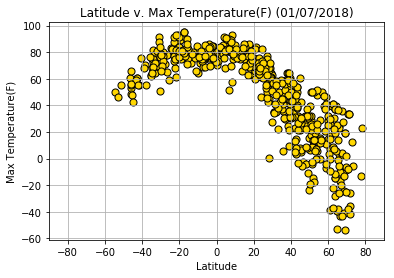

In [10]:
data_df.plot.scatter('Latitude','Max Temperature(F)', 
                       title='Latitude v. Max Temperature(F) (01/07/2018)', 
                       marker='o', 
                       s=50,
                       xlim=[-90, 90],
                       color='gold', 
                       edgecolor='black', 
                       grid=True)

# Save Figure
plt.savefig('output_data/Latitude v. Max Temperature.png',dpi=100, bbox_inches = "tight")

plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

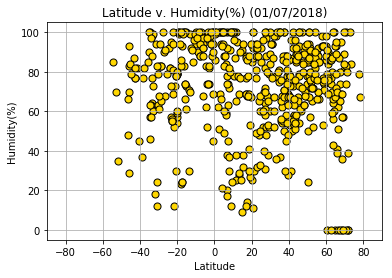

In [11]:
data_df.plot.scatter('Latitude','Humidity(%)', 
                       title='Latitude v. Humidity(%) (01/07/2018)', 
                       marker='o', 
                       s=50,
                       xlim=[-90, 90],
                       color='gold', 
                       edgecolor='black', 
                       grid=True)

# Save Figure
plt.savefig('output_data/Latitude v. Humidity.png',dpi=100, bbox_inches = "tight")

plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

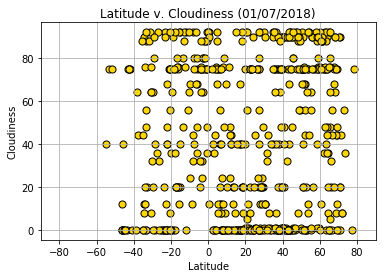

In [12]:
data_df.plot.scatter('Latitude','Cloudiness', 
                       title='Latitude v. Cloudiness (01/07/2018)', 
                       marker='o', 
                       s=50,
                       xlim=[-90, 90],
                       color='gold', 
                       edgecolor='black', 
                       grid=True)

# Save Figure
plt.savefig('output_data/Latitude v. Cloudiness.png',dpi=100, bbox_inches = "tight")

plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

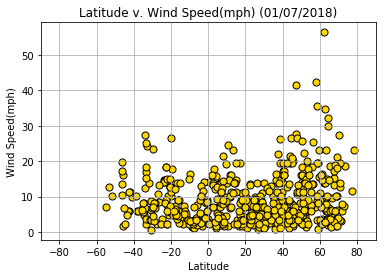

In [13]:
data_df.plot.scatter('Latitude','Wind Speed(mph)', 
                       title='Latitude v. Wind Speed(mph) (01/07/2018)', 
                       marker='o', 
                       s=50,
                       xlim=[-90, 90],
                       color='gold', 
                       edgecolor='black', 
                       grid=True)

# Save Figure
plt.savefig('output_data/Latitude v. Wind Speed.png',dpi=100, bbox_inches = "tight")

plt.show